
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 1 - Modelagem do Preço </center></h1>

A presente atividade prática abordará a modelagem estocástica do preço, somado a conceituação de volatilidade, expectativa de retorno o índice Sharpe entre outros aspectos fundamentais e quantitativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li>Modelo com Movimento Browniano</li>
        <li>Modelo com Movimento Browniano Geometrico</li>
        <li>Retorno de um Ativo Financeiro</li>
        <li>Expectativa de Retorno e Volatilidade</li>
        <li>Diagrama Risco Retorno</li>
        <li>Índice Sharpe</li>
        <li>Índice de Correlação</li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import yfinance as yf
from tqdm.notebook import tqdm



<div>
    <h2>1) Modelo de Preço com Movimento Browniano</h2>
</div>

<b>Bachelier</b> in 1900 descreveu o movimento do preço como <br>

<ul>
$ \large
\begin{equation}
 p(t)=p(0)+\mu t + \sigma w(t)\\ 
 \end{equation}
$
</ul>

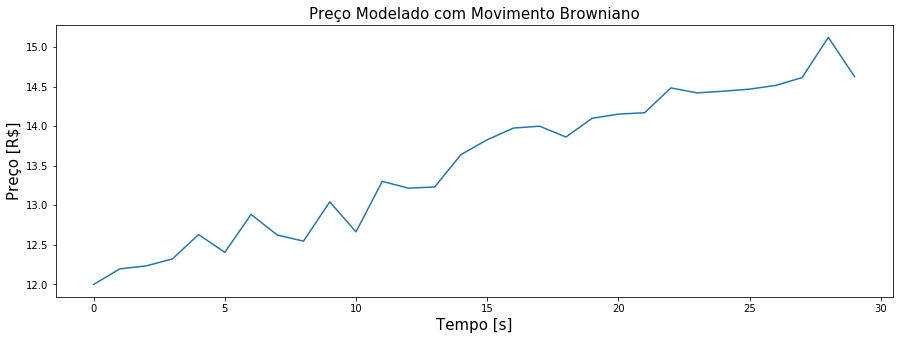

In [2]:
# Descrição do código
# Este código modela o preço de um ativo usando o movimento browniano.

# Parâmetros
po = 12 # Preço inicial do ativo
mu = 0.1 # Taxa de crescimento média do preço do ativo
sigma = 0.2 # Volatilidade do preço do ativo

# Geração de números aleatórios gaussianos
w = np.random.randn(30)

# Tempo
t = np.arange(0,30)

# Cálculo do preço do ativo
p1 = po + mu * t + sigma * w

# Plotagem do preço do ativo
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(t, p1)
plt.ylabel('Preço [R$]', fontsize=15)
plt.xlabel('Tempo [s]', fontsize=15)
plt.title('Preço Modelado com Movimento Browniano', fontsize=15)

# Exibição do gráfico
plt.show()


<div>
    <h2>2) Modelo de Preço com Movimento Browniano Geometrico</h2>
</div>

Uma melhor modelagem corresponde ao <b>Movimento Geometrico Browniano</b> definido por 
<ul>
$ \large
\begin{equation} 
 \frac{dp(t)}{p(t)}  = \mu dp(t) + \sigma dw(t) \\
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

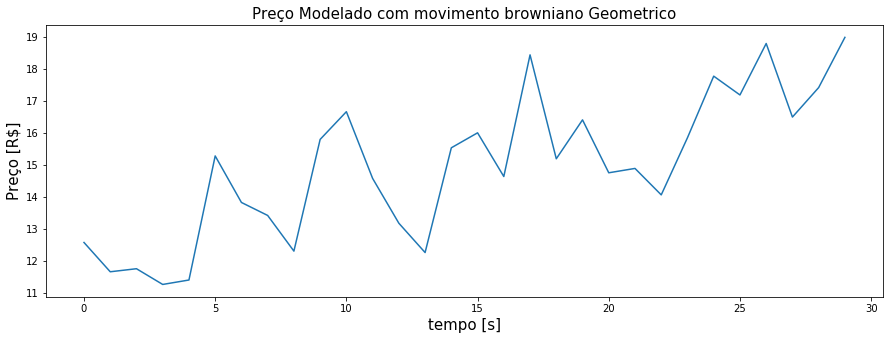

In [3]:
# Parâmetros
po = 12  # Preço inicial do ativo
mu = 0.02  # Taxa de crescimento média do preço
sigma = 0.11  # Volatilidade do preço

# Geração de números aleatórios gaussianos
w = np.random.normal(0, 1, 30)

# Tempo
t = np.arange(0, 30)

# Cálculo do preço
p2 = po * np.exp((mu - (sigma**2)/2) * t + sigma * w)

# Plotagem do preço
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(t, p2)
plt.ylabel('Preço [R$]', fontsize=15)
plt.xlabel('tempo [s]', fontsize=15)
plt.title('Preço Modelado com movimento browniano Geometrico', fontsize=15)
plt.show()


In [4]:
# Cria um DataFrame chamado df a partir dos dados contidos no array p1
df = pd.DataFrame(p1)

# Atribui o nome "p1" à coluna do DataFrame
df.columns = ["p1"]

# Adiciona uma nova coluna ao DataFrame chamada "p2" e preenche-a com os dados do array p2
df["p2"] = p2

# Calcula e exibe estatísticas descritivas básicas sobre as colunas do DataFrame
df.describe()


,p1,p2
count,30.000000,30.000000
mean,13.523878,14.946112
std,0.906362,2.262783
min,11.999105,11.254854
25%,12.637937,13.233768
50%,13.734153,15.040636
75%,14.357838,16.476884
max,15.122658,18.996041


Text(0.5, 1.0, 'Preços Modelados com Movimento Browniano')

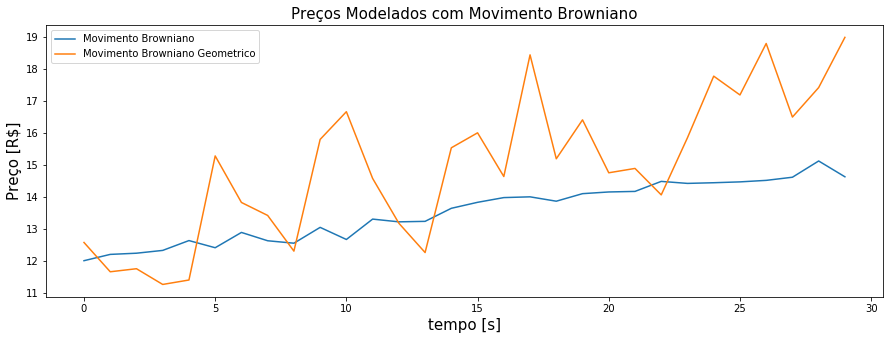

In [5]:
# Cria um DataFrame a partir dos dados nas variáveis p1 e p2
df = pd.DataFrame(p1)
df.columns = ['p1']  # Atribui o nome 'p1' à primeira coluna
df['p2'] = p2       # Adiciona a segunda coluna 'p2' com os dados de p2

# Cria um gráfico com duas linhas para comparar as séries
fig, ax = plt.subplots(figsize=(15, 5))  # Cria uma figura e um eixo
ax.plot(df['p1'], label='Movimento Browniano')  # Plota a primeira série
ax.plot(df['p2'], label='Movimento Browniano Geometrico')  # Plota a segunda série

# Adiciona legenda, rótulos e título ao gráfico
plt.legend(loc='upper left')  # Posiciona a legenda no canto superior esquerdo
plt.ylabel('Preço [R$]', fontsize=15)  # Define o rótulo do eixo y
plt.xlabel('tempo [s]', fontsize=15)  # Define o rótulo do eixo x
plt.title('Preços Modelados com Movimento Browniano', fontsize=15)  # Define o título do gráfico


<div>
    <h2>3) Retorno de um Ativo Financeiro</h2>
</div>

O <b>retorno</b> de um ativo em tempo discreto pode ser definindo pelas seguintes equações

<ul>
$ \large
\begin{equation}
 r(n)=\frac{p(n)-p(n-1)}{p(n-1)} \\ 
 r(n)=\frac{p(n)}{p(n-1)}-1 \\
 r(n)=ln[p(n)]-ln[p(n-1)]=ln[\frac{p(n)}{p(n-1)}]\cong\frac{p(n)}{p(n-1)}-1 
\end{equation}
$
</ul>

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

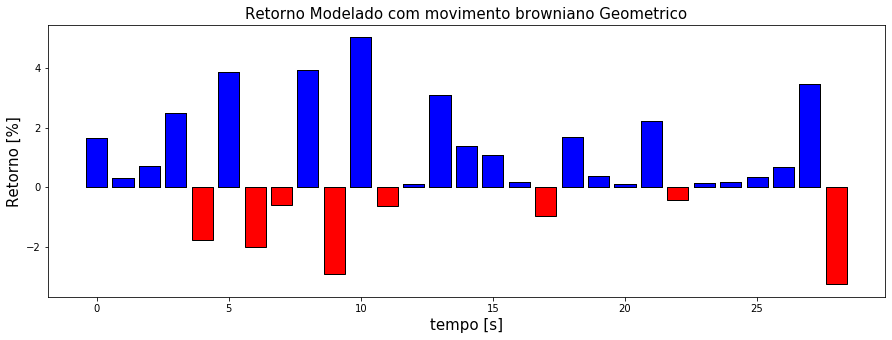

In [6]:
# Calcula os retornos logarítmicos da série p1
r1 = np.log(p1[1:]) - np.log(p1[0:-1])  # Subtrai os logaritmos de elementos consecutivos para obter retornos

# Cria um gráfico com tamanho personalizado
fig, ax = plt.subplots(figsize=(15, 5))

# Calcula os retornos diários da série p1
r1m = df['p1'][1:].values / df['p1'][0:-1].values - 1  # Divide elementos consecutivos e subtrai 1 para obter retornos

# Plota barras vermelhas para os retornos (apenas negativos devido à linha anterior)
plt.bar(range(len(r1)), 100 * r1m, color='red', edgecolor='black')

# Atribui 0 aos retornos negativos
r1m[np.where(r1m < 0)] = 0

# Plota barras azuis para os retornos (apenas positivos devido à linha anterior)
plt.bar(range(len(r1)), 100 * r1m, color='blue', edgecolor='black')

# Personaliza o gráfico
plt.ylabel('Retorno [%]', fontsize=15)
plt.xlabel('tempo [s]', fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico', fontsize=15)


Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

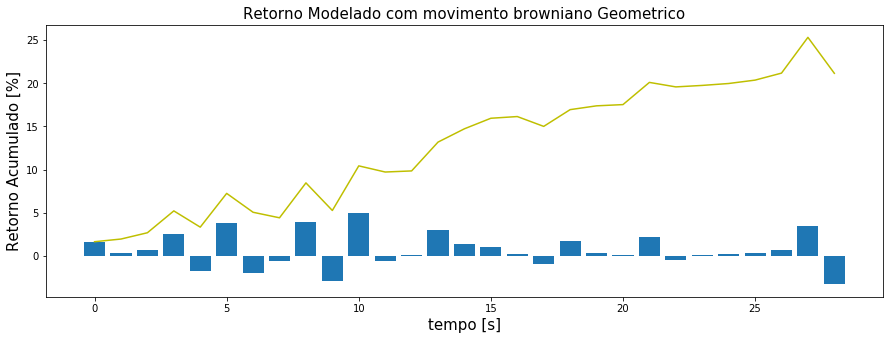

In [7]:
def sumper(per):
  """Calcula o retorno acumulado a partir de uma série de retornos percentuais."""
  persum = np.cumprod(1 + per) - 1  # Calcula o produto acumulado dos retornos + 1 e subtrai 1
  return 100 * persum  # Multiplica por 100 para obter o retorno acumulado em porcentagem

fig, ax = plt.subplots(figsize=(15, 5))  # Cria um gráfico com tamanho personalizado

plt.plot(sumper(r1), "y")  # Plota o retorno acumulado como linha amarela
plt.bar(range(len(r1)), 100 * r1)  # Plota os retornos individuais como barras

plt.ylabel('Retorno Acumulado [%]', fontsize=15)  # Define o rótulo do eixo y
plt.xlabel('tempo [s]', fontsize=15)  # Define o rótulo do eixo x
plt.title('Retorno Modelado com movimento browniano Geometrico', fontsize=15)  # Define o título do gráfico


Text(0.5, 1.0, 'Retornos Modelados com Movimento Browniano Geometrico')

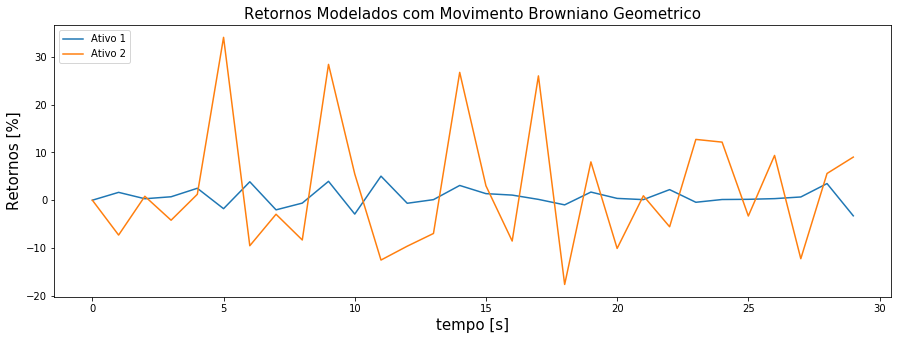

In [8]:
# Calcula os retornos diários para a série 'p1' e adiciona uma coluna 'r1' ao DataFrame
r1 = df['p1'][1:].values / df['p1'][0:-1].values - 1
df['r1'] = np.concatenate(([0], r1), axis=0)  # Adiciona um 0 inicial à série de retornos

# Repete o mesmo processo para a série 'p2'
r2 = df['p2'][1:].values / df['p2'][0:-1].values - 1
df['r2'] = np.concatenate(([0], r2), axis=0)

# Cria um gráfico com tamanho personalizado
fig, ax = plt.subplots(figsize=(15, 5))

# Plota os retornos diários dos dois ativos como linhas
plt.plot(100 * df['r1'], label='Ativo 1')
plt.plot(100 * df['r2'], label='Ativo 2')

# Adiciona uma legenda ao gráfico
plt.legend(loc='upper left')  # A linha plt.legend(loc='upper left') está duplicada

# Personaliza o gráfico
plt.ylabel('Retornos [%]', fontsize=15)
plt.xlabel('tempo [s]', fontsize=15)
plt.title('Retornos Modelados com Movimento Browniano Geometrico', fontsize=15)


In [9]:
# Imprime as primeiras 5 linhas do DataFrame
print("Inicio do Data Frame:")
print(df.head())

# Imprime as últimas 5 linhas do DataFrame
print("")
print("Fim do Data Frame:")
print(df.tail())

# Imprime algumas informações estatísticas sobre o DataFrame
print("")
print("Algumas Informações:")
print(df.describe())


Inicio do Data Frame:
          p1         p2        r1        r2
0  11.999105  12.569574  0.000000  0.000000
1  12.196271  11.651933  0.016432 -0.073005
2  12.233438  11.747497  0.003047  0.008202
3  12.321342  11.254854  0.007186 -0.041936
4  12.629322  11.393908  0.024996  0.012355

Fim do Data Frame:
           p1         p2        r1        r2
25  14.468129  17.191504  0.001855 -0.033113
26  14.515565  18.803566  0.003279  0.093771
27  14.613764  16.498777  0.006765 -0.122572
28  15.122658  17.422786  0.034823  0.056005
29  14.627759  18.996041 -0.032726  0.090299

Algumas Informações:
              p1         p2         r1         r2
count  30.000000  30.000000  30.000000  30.000000
mean   13.523878  14.946112   0.006812   0.021645
std     0.906362   2.262783   0.019761   0.132141
min    11.999105  11.254854  -0.032726  -0.176494
25%    12.637937  13.233768  -0.003251  -0.080728
50%    13.734153  15.040636   0.003163   0.004101
75%    14.357838  16.476884   0.016883   0.087792
ma

<div>
    <h2>4) Expectativa de Retorno e Volatilidade</h2>
</div>


A <b>Média</b> and <b>Desvio Padrão</b> do retorno de um ativo, $\mu$ and $\sigma$, são definidos com a <b>expectativa de retorno</b> e a  <b>volatilidade</b> de um ativo
<ul>
$ \large
\begin{equation} 
\mu=E\{ r(n) \}=E\{\frac{p(n)-p(n-1)}{p(n-1)}\} \\
\sigma=E\{r(n)-\mu\}=(E\{r(n)^2\}-\mu^2 )^{\frac{1}{2}} \\
\end{equation}
$
</ul>

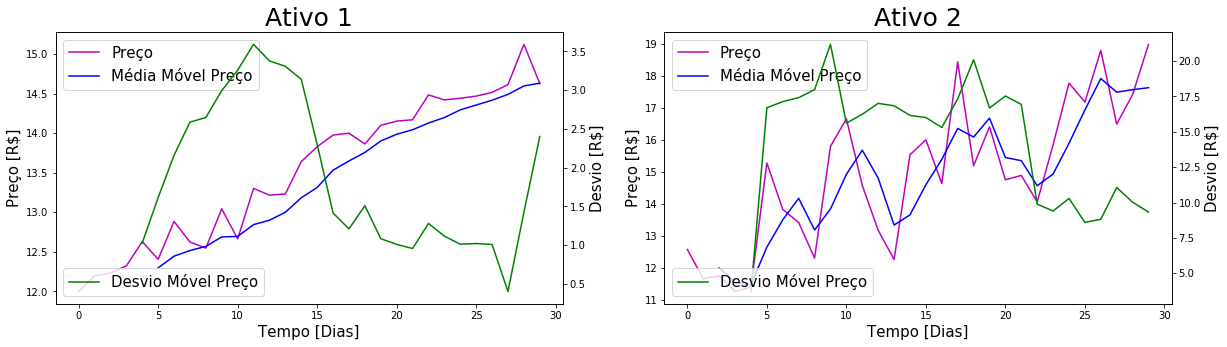

In [10]:
# Calcula os retornos diários para a série 'p1' e adiciona uma coluna 'r1' ao DataFrame
r1 = df['p1'][1:].values / df['p1'][0:-1].values - 1
df['r1'] = 100 * np.concatenate(([0], r1), axis=0)  # Adiciona um 0 inicial e converte para porcentagem

# Repete o mesmo processo para a série 'p2'
r2 = df['p2'][1:].values / df['p2'][0:-1].values - 1
df['r2'] = 100 * np.concatenate(([0], r2), axis=0)

# Cria uma figura com dois subplots lado a lado
fig = plt.subplots(figsize=(20, 5))

# Subplot 1: Ativo 1
ax1 = plt.subplot(1, 2, 1)

# Plota o preço do Ativo 1 (linha roxa) e sua média móvel (linha azul)
ax1.plot(df['p1'], color='m', label='Preço')
ax1.plot(df['p1'].rolling(window=6).mean(), color='b', label='Média Móvel Preço')

# Cria um eixo secundário para plotar o desvio padrão móvel dos retornos
ax2 = ax1.twinx()
ax2.plot(df['r1'].rolling(window=5).std(), color='g', label='Desvio Móvel Preço')

# Personaliza o subplot 1
ax1.set_title('Ativo 1', fontsize=25)
ax1.set_ylabel('Preço [R$]', fontsize=15)
ax2.set_ylabel('Desvio [R$]', fontsize=15)
ax1.set_xlabel('Tempo [Dias]', fontsize=15)
ax1.legend(loc='upper left', fontsize=15)
ax2.legend(loc='lower left', fontsize=15)

# Subplot 2: Ativo 2 (segue a mesma estrutura do subplot 1)
ax1 = plt.subplot(1, 2, 2)
ax1.plot(df['p2'], color='m', label='Preço')
ax1.plot(df['p2'].rolling(window=3).mean(), color='b', label='Média Móvel Preço')
ax2 = ax1.twinx()
ax2.plot(df['r2'].rolling(window=5).std(), color='g', label='Desvio Móvel Preço')
ax1.set_title('Ativo 2', fontsize=25)
ax1.set_ylabel('Preço [R$]', fontsize=15)
ax2.set_ylabel('Desvio [R$]', fontsize=15)
ax1.set_xlabel('Tempo [Dias]', fontsize=15)
ax1.legend(loc='upper left', fontsize=15)
ax2.legend(loc='lower left', fontsize=15)


<div >
    <h2>5) Diagrama Risco Retorno</h2>
</div>


Em um <b>diagrama retorno x risco </b> para um dado retorno previsto o risco também é estimado

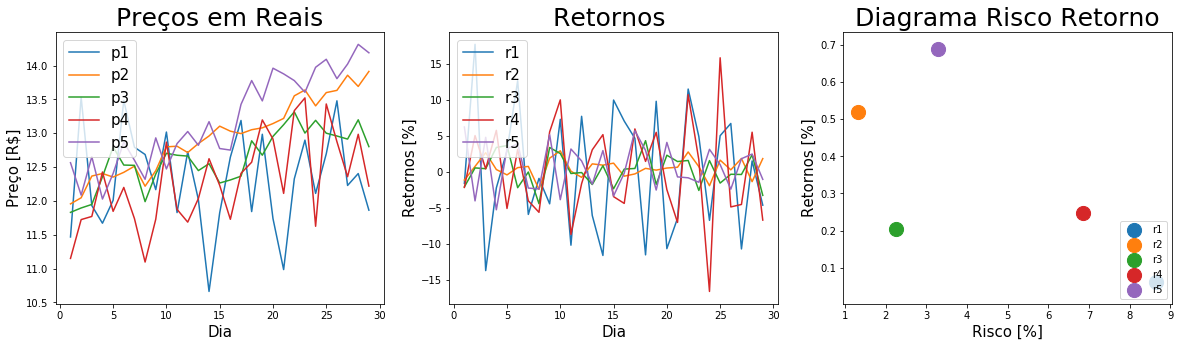

In [11]:
def MBG(po, mu, sigma, t):
    """Simula um caminho de preços usando o modelo de movimento browniano geométrico."""
  # Gera números aleatórios com distribuição normal
    w = np.random.normal(0, 1, t)
  # Cria um vetor de tempo
    t = np.arange(0, t)
  # Calcula os preços a cada período
    return po * np.exp((mu - (sigma**2)/2) * t + sigma * w)


# Define parâmetros iniciais para 5 ativos
po = [12, 12, 12, 12, 12]  # Preços iniciais
mu = [0.003, 0.005, 0.0033, 0.0041, 0.006]  # Taxas de retorno esperadas
sigma = [0.08, 0.01, 0.02, 0.05, 0.022]  # Volatilidades
t = 30  # Número de períodos

# Gera caminhos de preços para cada ativo e cria um DataFrame
df = None
for i in range(len(po)):
    if df is None:
        df = pd.DataFrame(MBG(po[i], mu[i], sigma[i], t))
    else:
        df = pd.concat([df, pd.DataFrame(MBG(po[i], mu[i], sigma[i], t))], axis=1)

# Adiciona nomes às colunas
df.columns = list(['p' + str(x) for x in range(1, len(po) + 1)])

# Calcula retornos percentuais
ret = 100 * df[df.columns[:5]].diff() / df[df.columns[:5]].iloc[0]

# Nomeia as colunas de retornos
ret.columns = list(['r' + str(x) for x in range(1, len(po) + 1)])

# Adiciona as colunas de retornos ao DataFrame
df = pd.concat([df, ret], axis=1)

# Remove linhas com valores ausentes
df = df.dropna()

# Cria uma figura com três subplots
fig = plt.subplots(figsize=(20, 5))

# Subplot 1: Preços em Reais
ax1 = plt.subplot(1, 3, 1)
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais', fontsize=25)
ax1.set_ylabel('Preço [R$]', fontsize=15)
ax1.set_xlabel('Dia', fontsize=15)
ax1.legend(loc='upper left', fontsize=15)

# Subplot 2: Retornos
ax2 = plt.subplot(1, 3, 2)
df[df.columns[5:]].plot(ax=ax2)
ax2.set_title('Retornos ', fontsize=25)
ax2.set_ylabel('Retornos [%]', fontsize=15)
ax2.set_xlabel('Dia', fontsize=15)
ax2.legend(loc='upper left', fontsize=15)

# Subplot 3: Diagrama Risco Retorno
ax3 = plt.subplot(1, 3, 3)

# Risco (volatilidade)
x = df[df.columns[5:]].std().values

# Retorno esperado
y = df[df.columns[5:]].mean().values

# Plota os pontos no diagrama
for i in range(len(x)):
    ax3.scatter(x[i], y[i], s=200, label='r' + str(1 + i))

# Adiciona legenda
plt.legend(loc='lower right')

# Ajusta os rótulos dos eixos
plt.ylabel('Retornos [%]', fontsize=15)
plt.xlabel('Risco [%]', fontsize=15)

# Ajusta o título do
plt.title('Diagrama Risco Retorno', fontsize=25)
plt.show()


<div>
    <h2>6) Indice Sharpe</h2>
</div>



O <b>Índice de Sharpe</b> foi criado por William Sharpe (Nobel de Economia em 1990) e permite avaliar a relação entre o retorno e o risco de um investimento. Ele mede qual é a relação entre o retorno excedente ao ativo livre de risco e a volatilidade.
O <b>Índice Sharpe</b> é definido por
<ul>


$ \Large
\begin{equation} 
 SR=\frac{\mu-r_f}{\sigma}  
\end{equation}
$


</ul>

In [12]:
sharpe5=(df['r5'].mean()-2/(12))/df['r5'].std()
sharpe2=(df['r2'].mean()-2/(12))/df['r2'].std()
print("Indice Sharpe de r5 = %.2f e Indice Shape de r2 = %.2f" % (sharpe5, sharpe2))

Indice Sharpe de r5 = 0.16 e Indice Shape de r2 = 0.27


<div >
    <h2>7) Indice de Correlação</h2>
</div>



O coeficiente de correlação de Pearson, também conhecido como $\rho$ de Pearson, é uma medida que identifica o grau de correlação entre duas variáveis. É calculado da seguinte forma:

\[
\begin{align*}
cov[r_1(n),r_2(n)] &= E\{r_{1}(n)r_{2}(n)\} - \mu_{1} \mu_{2} \\[10pt]
\rho &= \frac{E\{r_{1}(n)r_{2}(n)\} - \mu_{1} \mu_{2}}{\sigma_{1} \sigma_{2}}
\end{align*}
\]

onde:
- $cov[r_1(n),r_2(n)]$ representa a covariância entre as séries temporais $r_1(n)$ e $r_2(n)$.
- $\rho$ é o coeficiente de correlação de Pearson.
- $E\{r_{1}(n)r_{2}(n)\}$ é o valor esperado do produto das séries temporais.
- $\mu_{1}$ e $\mu_{2}$ são as médias das séries temporais $r_1(n)$ e $r_2(n)$, respectivamente.
- $\sigma_{1}$ e $\sigma_{2}$ são os desvios padrão das séries temporais $r_1(n)$ e $r_2(n)$, respectivamente.

Essa medida varia de -1 a 1, indicando respectivamente uma correlação negativa perfeita, ausência de correlação e correlação positiva perfeita entre as variáveis.


In [13]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()
print("Indice de correlação pela equação explícita (%.6f) e função implícita (%.6f)" % (cor1, cor2['r1'][1]))

Indice de correlação pela equação explícita (-0.028761) e função implícita (-0.028761)


In [14]:
df.corr()

,p1,p2,p3,p4,p5,r1,r2,r3,r4,r5
p1,1.000000,-0.015403,-0.059381,0.156112,-0.092822,0.698573,-0.043529,-0.237468,0.244882,-0.261653
p2,-0.015403,1.000000,0.788046,0.661589,0.882195,-0.063084,0.201565,-0.073003,-0.029162,-0.094376
p3,-0.059381,0.788046,1.000000,0.640713,0.789008,-0.073671,0.104896,0.292878,-0.024307,0.005223
p4,0.156112,0.661589,0.640713,1.000000,0.564706,0.211104,0.420772,0.116111,0.568131,-0.207264
p5,-0.092822,0.882195,0.789008,0.564706,1.000000,-0.196182,0.067703,0.012252,-0.046092,0.237141
r1,0.698573,-0.063084,-0.073671,0.211104,-0.196182,1.000000,-0.028761,-0.221998,0.376458,-0.409663
r2,-0.043529,0.201565,0.104896,0.420772,0.067703,-0.028761,1.000000,0.120552,0.475571,-0.160537
r3,-0.237468,-0.073003,0.292878,0.116111,0.012252,-0.221998,0.120552,1.000000,0.141597,0.204898
r4,0.244882,-0.029162,-0.024307,0.568131,-0.046092,0.376458,0.475571,0.141597,1.000000,-0.112670
r5,-0.261653,-0.094376,0.005223,-0.207264,0.237141,-0.409663,-0.160537,0.204898,-0.112670,1.000000


In [15]:
print('Matriz de Correlações')
print('')
print(df[df.columns[5:]].corr())

Matriz de Correlações

          r1        r2        r3        r4        r5
r1  1.000000 -0.028761 -0.221998  0.376458 -0.409663
r2 -0.028761  1.000000  0.120552  0.475571 -0.160537
r3 -0.221998  0.120552  1.000000  0.141597  0.204898
r4  0.376458  0.475571  0.141597  1.000000 -0.112670
r5 -0.409663 -0.160537  0.204898 -0.112670  1.000000


In [16]:
# Importa os módulos necessários
import os
import csv
from datetime import datetime


# **Diretório onde o arquivo CSV está localizado**
diretorio = './input'

# **Nome do arquivo CSV que você deseja ler**
nome_arquivo = 'IBRADia_02-01-24.csv'

# **Caminho completo para o arquivo CSV**
caminho_completo = os.path.join(diretorio, nome_arquivo)

# **Cria uma estrutura de dados vazia para armazenar os dados**
B3Full = {}

# **Verifica se o arquivo existe antes de tentar lê-lo**
if os.path.exists(caminho_completo):

    # **Abre o arquivo CSV para leitura**
    with open(caminho_completo, 'r', newline='', encoding='iso-8859-1') as arquivo_csv:

        # **Cria um objeto leitor de CSV**
        leitor_csv = csv.reader(arquivo_csv, delimiter=';')

        # **Lê o cabeçalho do arquivo CSV**
        cabecalho = next(leitor_csv)

        # **Itera sobre cada linha do arquivo CSV**
        for linha in leitor_csv:

            # **Processa cada linha do arquivo CSV**

            # **Atualiza a estrutura de dados com os dados da linha**
            # B3Full.update({linha[-2]:{'Razão Social': linha[0],'Fundo':linha[1]}})
            B3Full.update({linha[0]:{'Ação': linha[0],'Qtde':linha[-2]}})

            # **Exibe a linha processada**
            # print(linha)

else:

    # **Exibe uma mensagem de erro se o arquivo não for encontrado**
    print(f'O arquivo {nome_arquivo} não foi encontrado em {diretorio}')

# **Exibe o tamanho da estrutura de dados**
print(len(B3Full))


181


In [17]:
# Cria uma lista com os símbolos B3 para buscar cotações (removendo linha comentada)
B3s = [b3 for b3 in list(B3Full.keys())]  # Utiliza os símbolos diretamente

# Itera sobre cada símbolo B3 na lista
for b3 in tqdm(B3s):

    # Símbolo do ETF para obter cotações
    b3_symbol = b3

    # Cria um objeto Ticker usando o símbolo B3 e a terminação ".SA"
    b3 = yf.Ticker(b3_symbol + ".SA")

    # Obtém o histórico de cotações para o símbolo B3
    historico_cotacoes = b3.history(period="max")

    # Extrai a data de cada cotação e cria uma lista de objetos datetime
    data = [datetime.strptime(str(x)[:10], "%Y-%m-%d") for x in list(historico_cotacoes.index.values)]

    # Atualiza o dicionário B3Full com informações adicionais:
    B3Full[b3_symbol].update({
        'Profit': historico_cotacoes.Close.pct_change().values,  # Percentual de mudança no preço de fechamento
        'Data': data,  # Lista de datas
        'volume': historico_cotacoes.Volume.values  # Volume de negociação
    })


  0%|          | 0/181 [00:00<?, ?it/s]

- CÓDIGO.SA: No data found, symbol may be delisted
- QUANTIDADE TEÓRICA TOTAL.SA: No data found, symbol may be delisted
- REDUTOR.SA: No data found, symbol may be delisted


In [18]:
# Obter a data de hoje

# Lista para armazenar ETFs selecionados
etfSel = []

# Número de anos para retroceder no histórico
anos = 3

# Dataframes e variáveis auxiliares
keysId = []
profit = pd.DataFrame()

# Obter a data de hoje e calcular a data limite
data_hoje = dt.datetime.today()
tempo_atras = data_hoje - dt.timedelta(days=anos*365)
print(tempo_atras)  # Exibe a data limite

# Iterar sobre cada ETF no dicionário B3Full
for etf in tqdm(list(B3Full.keys())):

    # Encontrar a posição da data limite no histórico do ETF
    pos = np.where(np.array(B3Full[etf]['Data']) < tempo_atras)[0]

    # Se houver dados antes da data limite:
    if list(pos) != []:

        # Criar um DataFrame com datas e lucros a partir da posição limite
        df = pd.DataFrame([B3Full[etf]['Data'][pos[-1]:], B3Full[etf]['Profit'][pos[-1]:]]).transpose()
        df.columns = ['Data', etf]

        # Concatenar o DataFrame ao DataFrame principal 'profit'
        profit = pd.concat([profit, df.set_index('Data')], axis=1)

        # Adicionar o ETF à lista de ETFs selecionados
        etfSel.append(etf)

# Calcular a correlação entre os ETFs selecionados (usando apenas colunas de 20 a 50)
corre = profit[profit.columns[20:50]].pct_change().corr()

# Exibir a matriz de correlação
corre


2021-01-04 08:35:14.552761


  0%|          | 0/181 [00:00<?, ?it/s]

,BRFS3,BPAC11,CAML3,CRFB3,BHIA3,CCRO3,CEAB3,CMIG3,CMIG4,CIEL3,...,PNVL3,DIRR3,ECOR3,ELET3,ELET6,EMBR3,ENAT3,ENGI11,ENEV3,EGIE3
BRFS3,1.000000,0.024596,0.027283,0.008717,0.008505,-0.018734,-0.043454,0.004449,-0.015876,0.027867,...,0.016216,0.032758,0.220480,0.011911,0.028871,-0.032055,0.013968,-0.004132,0.028221,-0.017987
BPAC11,0.024596,1.000000,-0.047844,0.016899,0.019787,-0.012376,0.012187,-0.013679,-0.024182,0.000037,...,-0.037841,0.058878,0.116493,0.035671,-0.008119,0.000831,-0.023976,0.017511,0.076823,-0.009931
CAML3,0.027283,-0.047844,1.000000,0.046987,0.052306,-0.017417,-0.007783,0.003956,0.001394,-0.005008,...,0.014524,-0.033440,-0.074090,0.018375,-0.032369,0.002561,-0.013742,0.004762,0.010800,-0.001284
CRFB3,0.008717,0.016899,0.046987,1.000000,-0.007749,-0.112312,0.057137,0.018665,-0.030359,0.013446,...,0.099564,0.047346,0.035890,-0.005033,0.028860,-0.001391,0.020939,0.017437,-0.007690,0.022223
BHIA3,0.008505,0.019787,0.052306,-0.007749,1.000000,-0.031801,0.067941,0.047602,0.011721,-0.010908,...,0.017084,0.055129,-0.021097,-0.044823,0.008304,-0.056035,-0.042865,0.056988,0.072448,-0.005541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMBR3,-0.032055,0.000831,0.002561,-0.001391,-0.056035,0.152148,-0.004182,0.017366,0.125998,0.010877,...,-0.001645,0.025348,-0.005747,0.012225,-0.036262,1.000000,-0.122601,-0.023796,0.005599,-0.007540
ENAT3,0.013968,-0.023976,-0.013742,0.020939,-0.042865,0.002157,0.004562,-0.019407,-0.002328,0.005944,...,0.019460,0.007831,-0.028114,0.007496,0.013324,-0.122601,1.000000,-0.020500,0.013480,0.048947
ENGI11,-0.004132,0.017511,0.004762,0.017437,0.056988,-0.011396,0.045128,0.002890,0.024219,0.045028,...,0.018385,0.029522,0.019512,-0.011781,0.017665,-0.023796,-0.020500,1.000000,-0.022600,0.011835
ENEV3,0.028221,0.076823,0.010800,-0.007690,0.072448,0.015417,-0.001160,0.065900,0.090006,-0.023450,...,-0.045273,0.023711,-0.013360,-0.028047,0.044787,0.005599,0.013480,-0.022600,1.000000,-0.019978


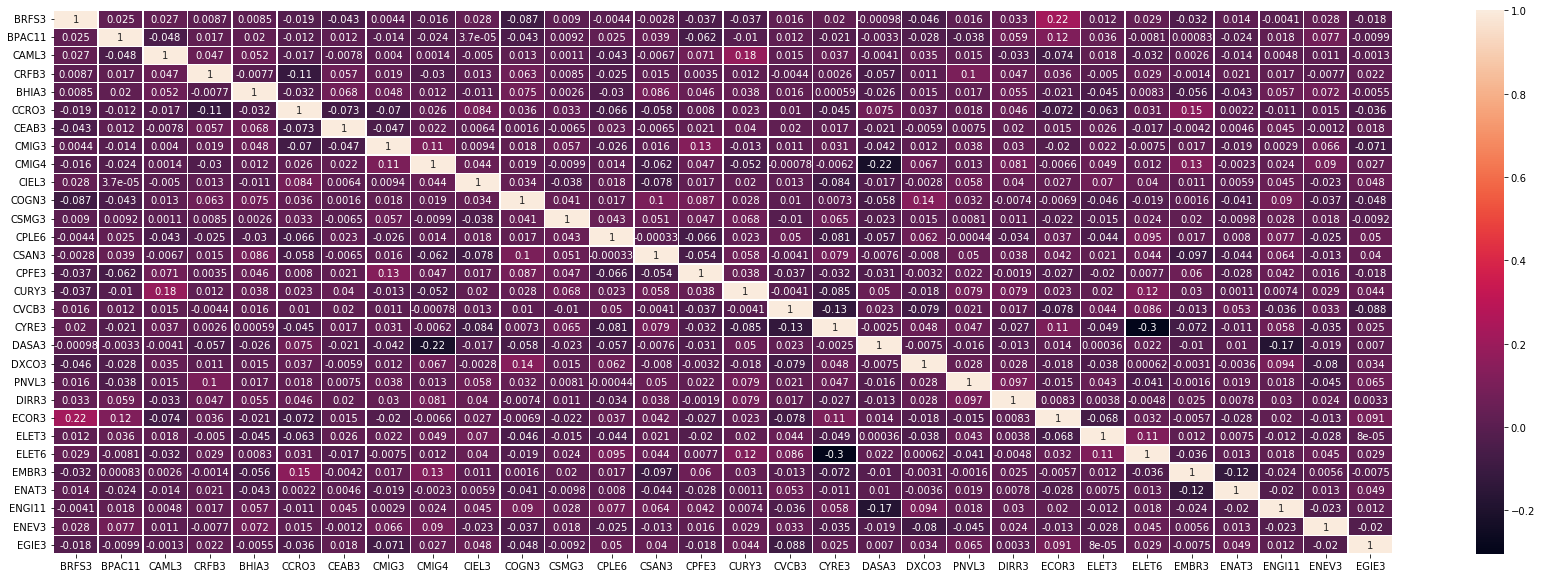

In [19]:
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

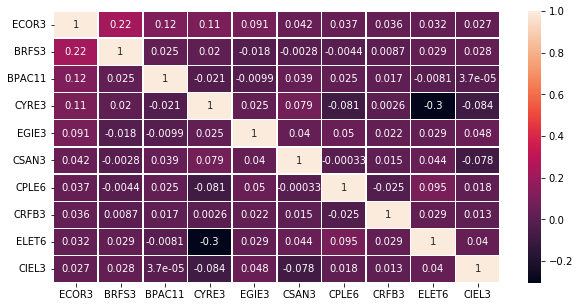

In [20]:
ativo='ECOR3'
k = 10 #number of variables for heatmap
cols = corre.nlargest(k, ativo)[ativo].index
cm = profit[cols].pct_change().corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

<b>Fim da Atividade!!!</b> 
